In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,
Comm: tls://192.168.198.19:8786,Workers: 0
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [2]:
samples_bkg = [
    "DYJetsToMuMu_M10to50",
    "DYJetsToMuMu_M50", 
    
    # "QCD_Pt15To20", # ISSUE
    "QCD_Pt20To30",
    "QCD_Pt30To50",
    "QCD_Pt50To80", 
    "QCD_Pt80To120",
    # "QCD_Pt120To170", # ISSUE
    "QCD_Pt170To300",
    "QCD_Pt300To470",
    "QCD_Pt470To600",
    "QCD_Pt600To800",
    # "QCD_Pt800To1000", # ISSUE
    "QCD_Pt1000",

    "TTJets", 
    
]

In [ ]:
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=5, location_cfg="backgrounds.yaml")

runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    # maxchunks=100,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
)

output_bkg = runner.run(fileset_bkg, treename="Events", processor_instance=p)

out_bkg = output_bkg["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/

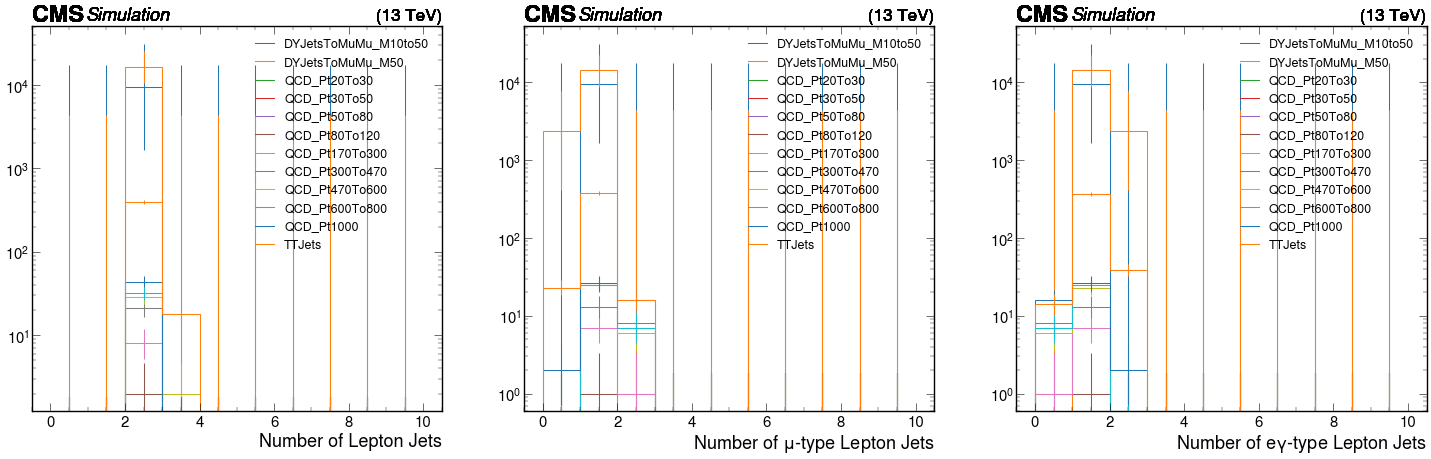

In [5]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["lj_n"][channels[0], :], density=False)
plt.legend(samples_bkg, loc=1, prop={'size': 18})
plt.yscale('log')

plt.subplot(1,3,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["mu_lj_n"][channels[0], :], density=False)
plt.legend(samples_bkg, loc=1, prop={'size': 18})
plt.yscale('log')

plt.subplot(1,3,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["egm_lj_n"][channels[0], :], density=False)
plt.legend(samples_bkg, loc=1, prop={'size': 18})
plt.yscale('log')
# plt.ylim(0.1,1000000)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/

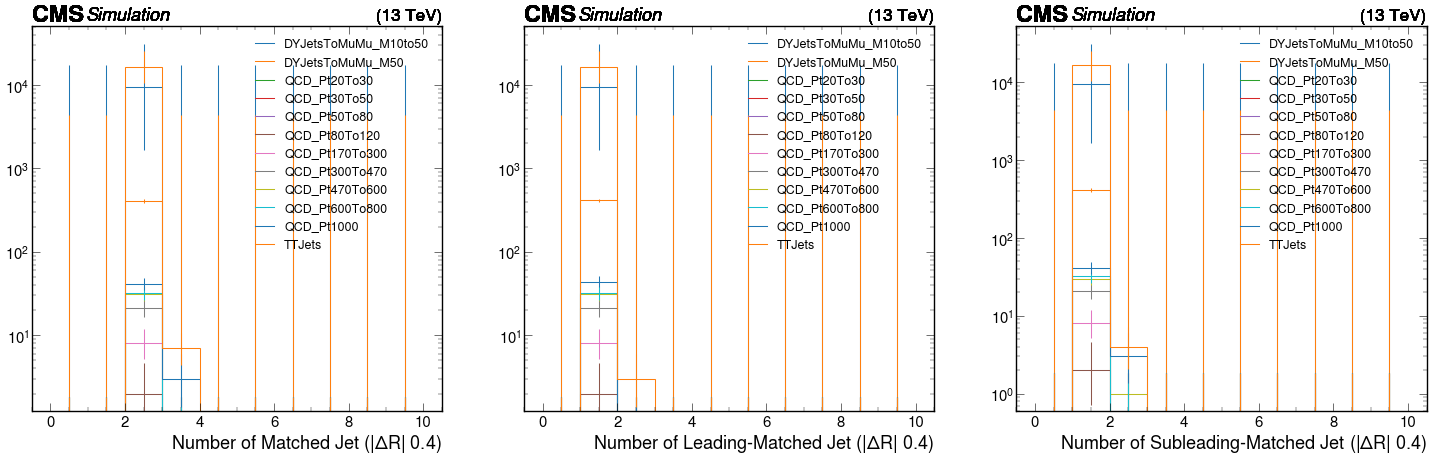

In [7]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_bkg, loc=1, prop={'size': 18})
plt.yscale('log')

plt.subplot(1,3,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_bkg, loc=1, prop={'size': 18})
plt.yscale('log')

plt.subplot(1,3,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_bkg, loc=1, prop={'size': 18})
plt.yscale('log')

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

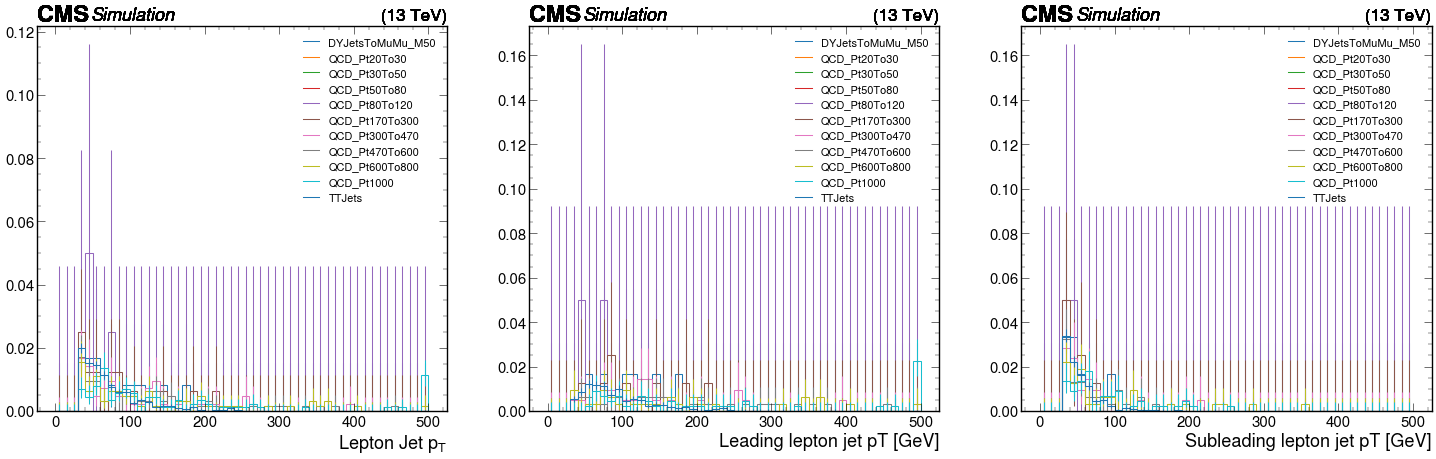

In [11]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["lj_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["lj0_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["lj1_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

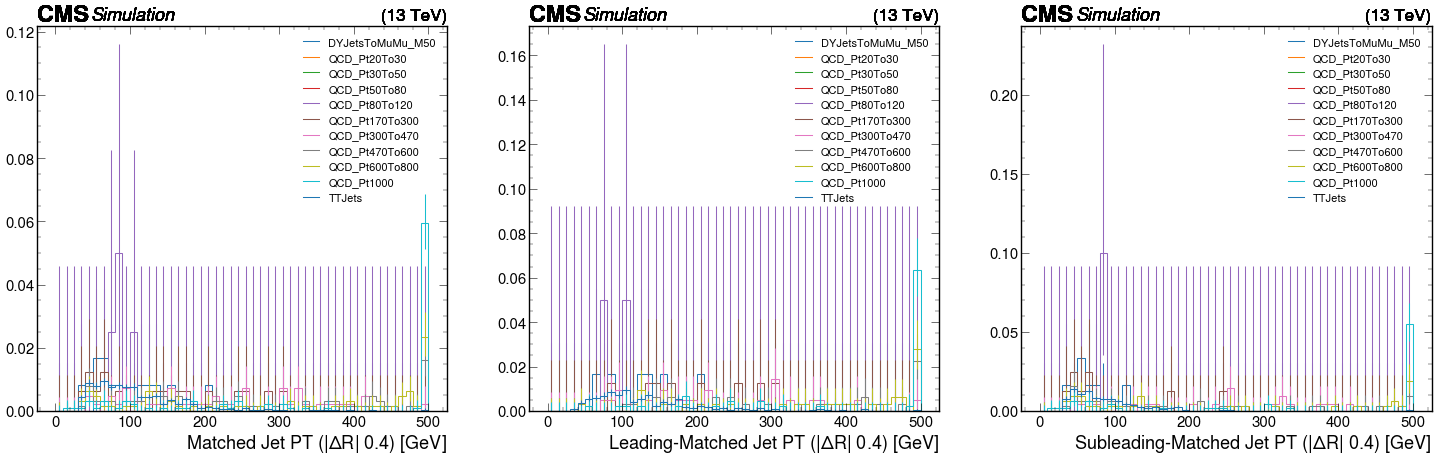

In [12]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

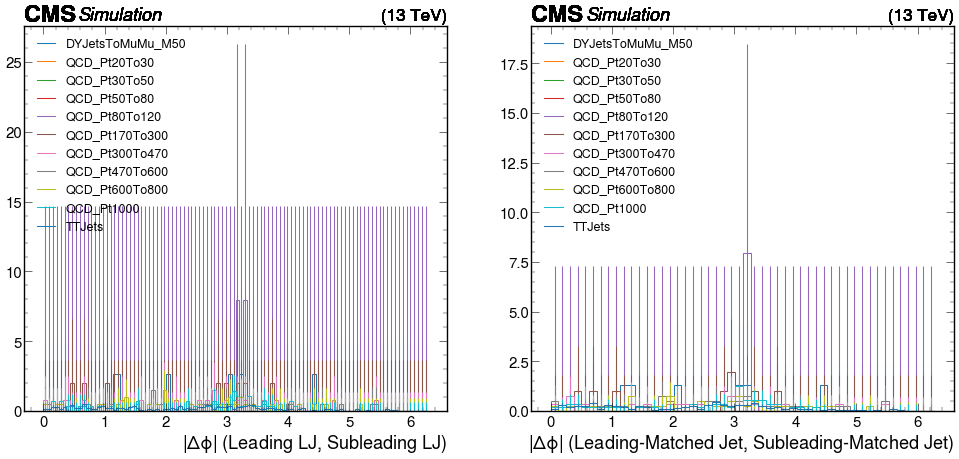

In [13]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["lj_lj_absdphi"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 18})

plt.subplot(1,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["matchedjet_matchedjet_absdphi"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

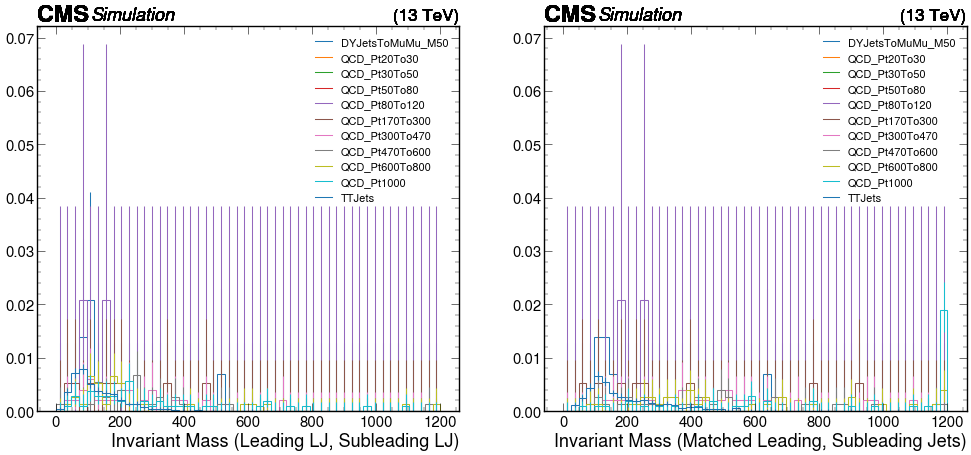

In [14]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(1,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

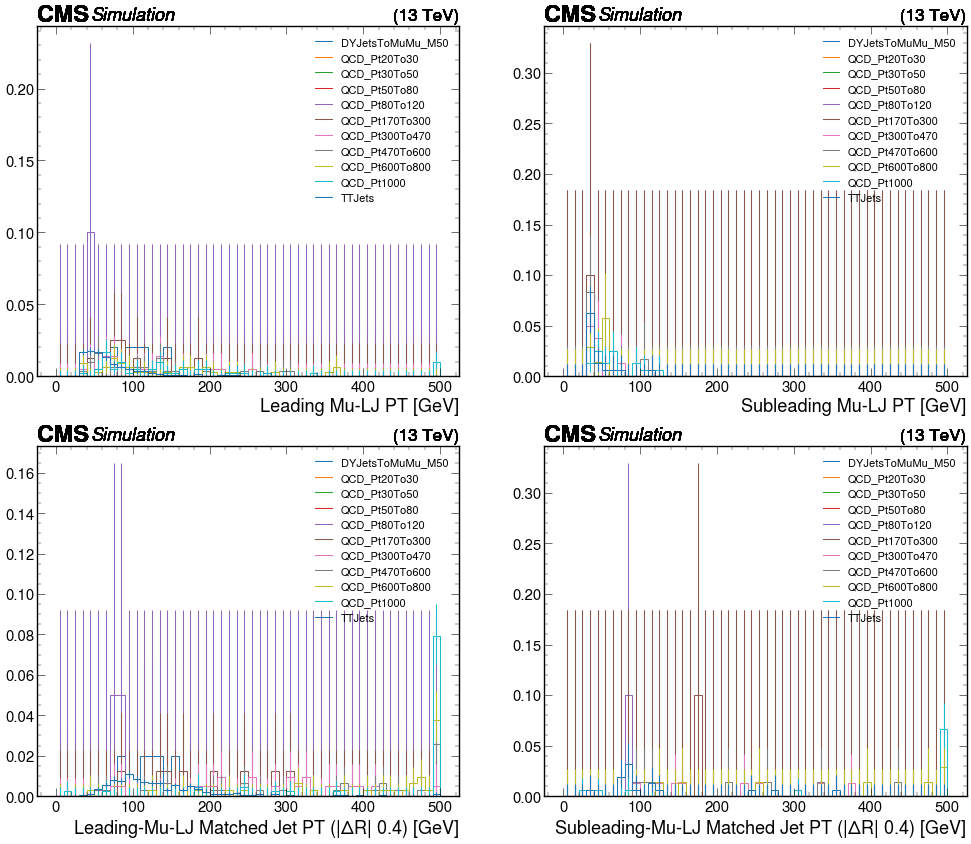

In [15]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_lj_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_mu_lj_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_mu_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

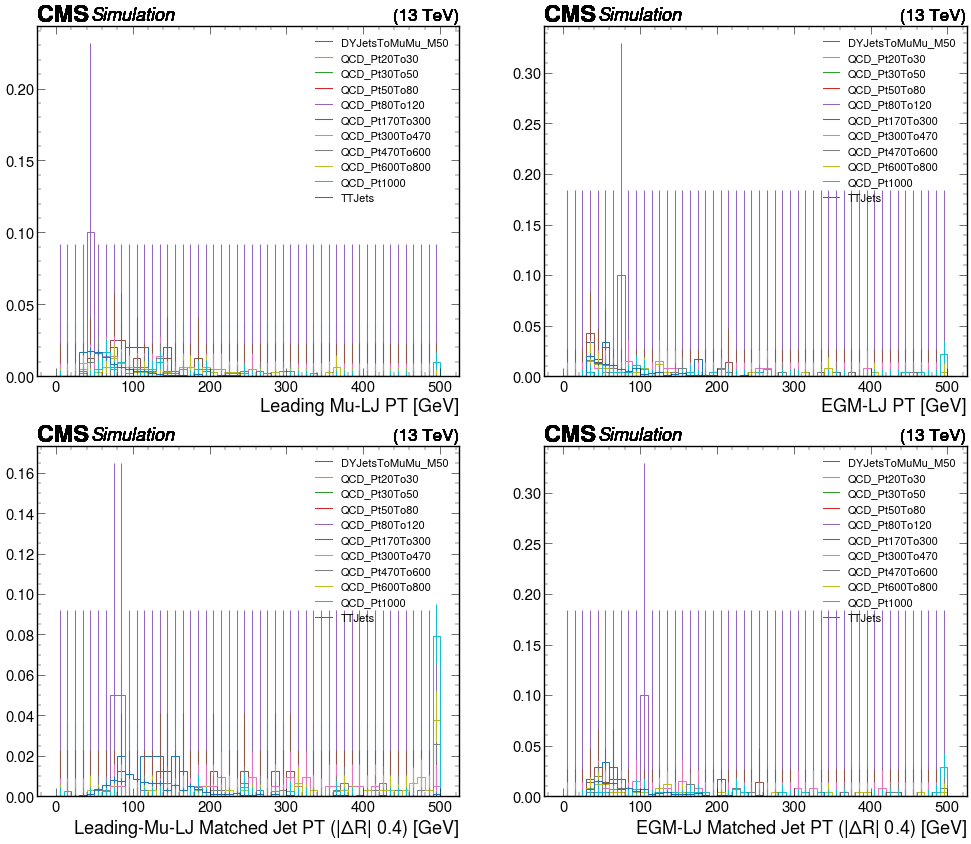

In [16]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_lj_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_egm_lj_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["egm_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

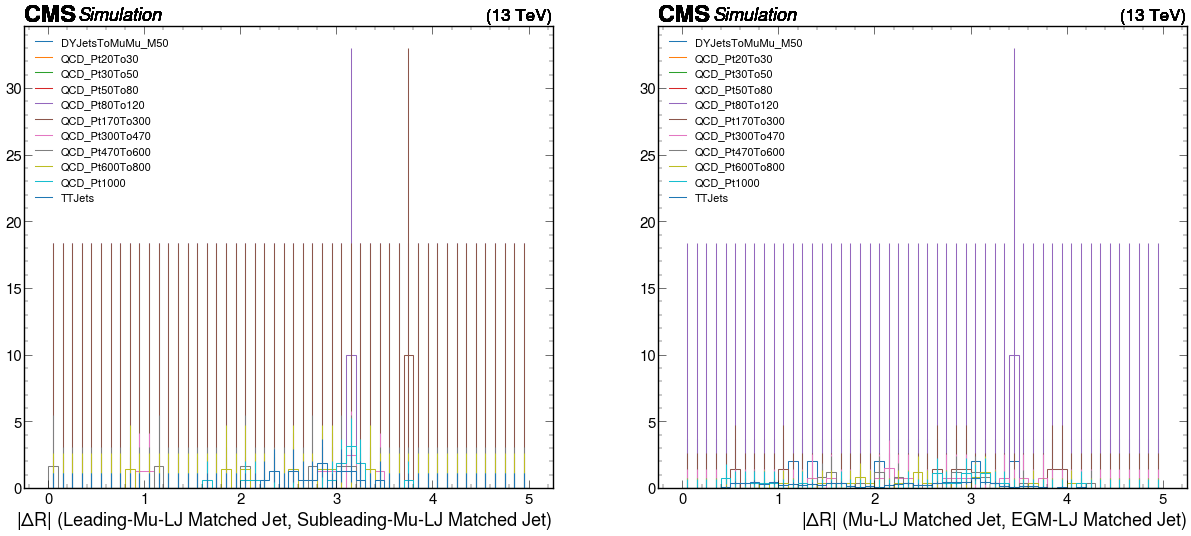

In [17]:
plt.subplots(1,2,figsize=(30,12))

plt.subplot(1,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["mu_matchedjet_mu_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 16})

plt.subplot(1,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["mu_matchedjet_egm_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

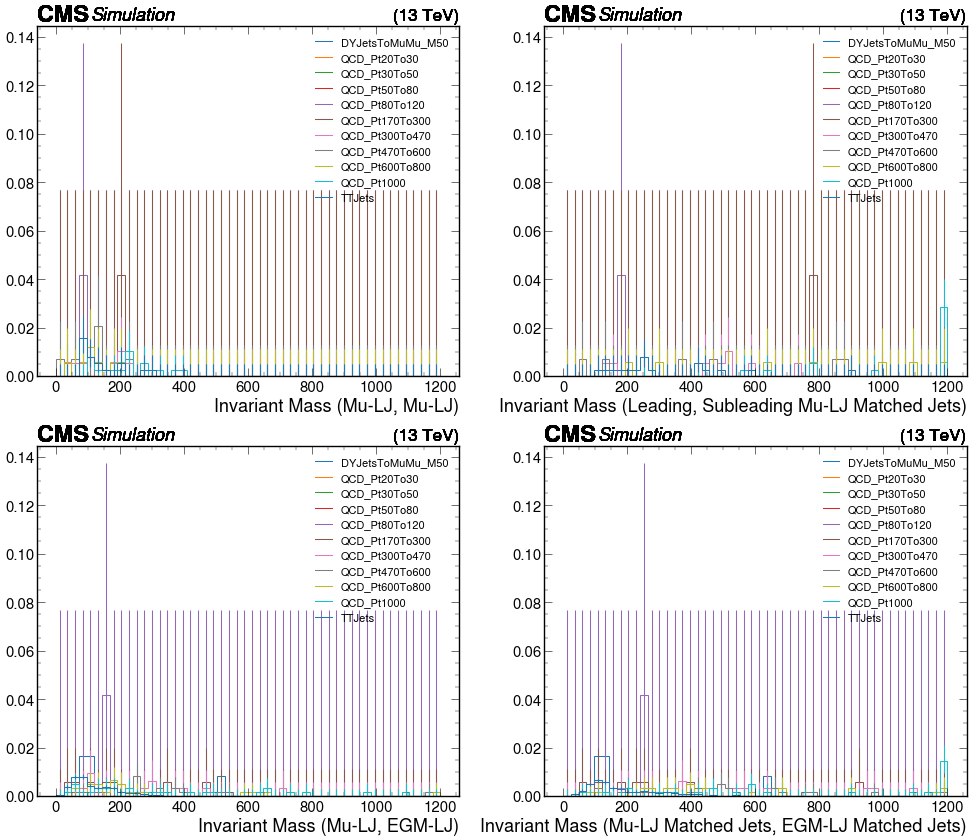

In [18]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["mu_lj_mu_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["mu_matchedjet_mu_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["mu_lj_egm_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["mu_matchedjet_egm_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

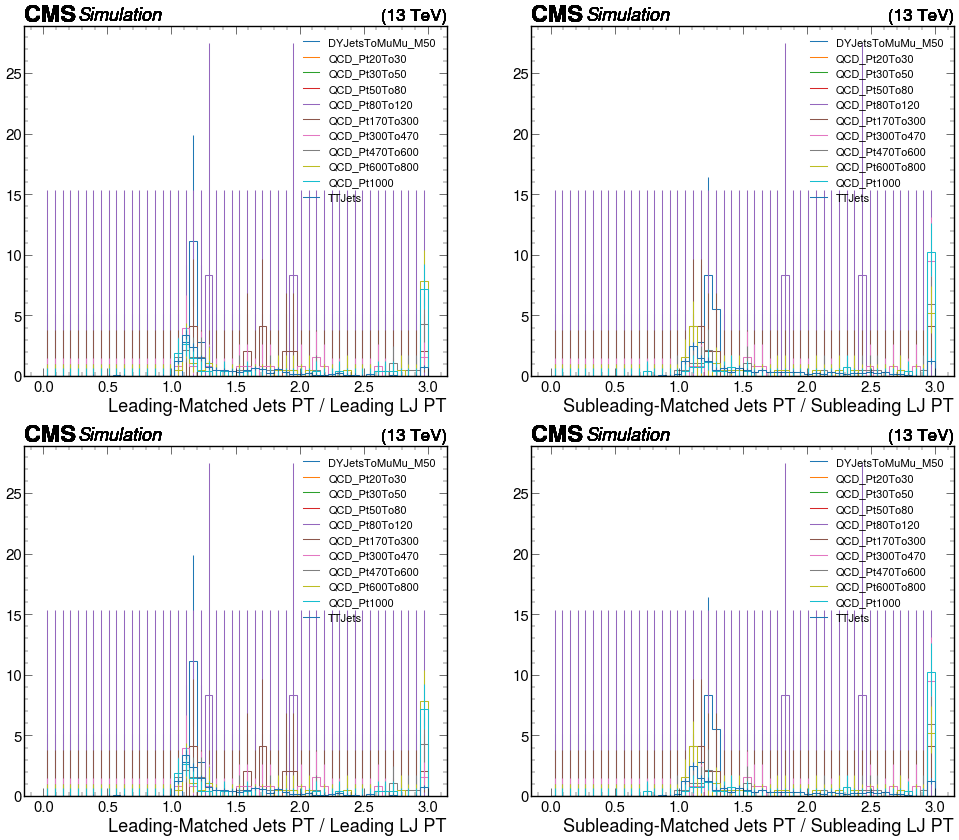

In [19]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

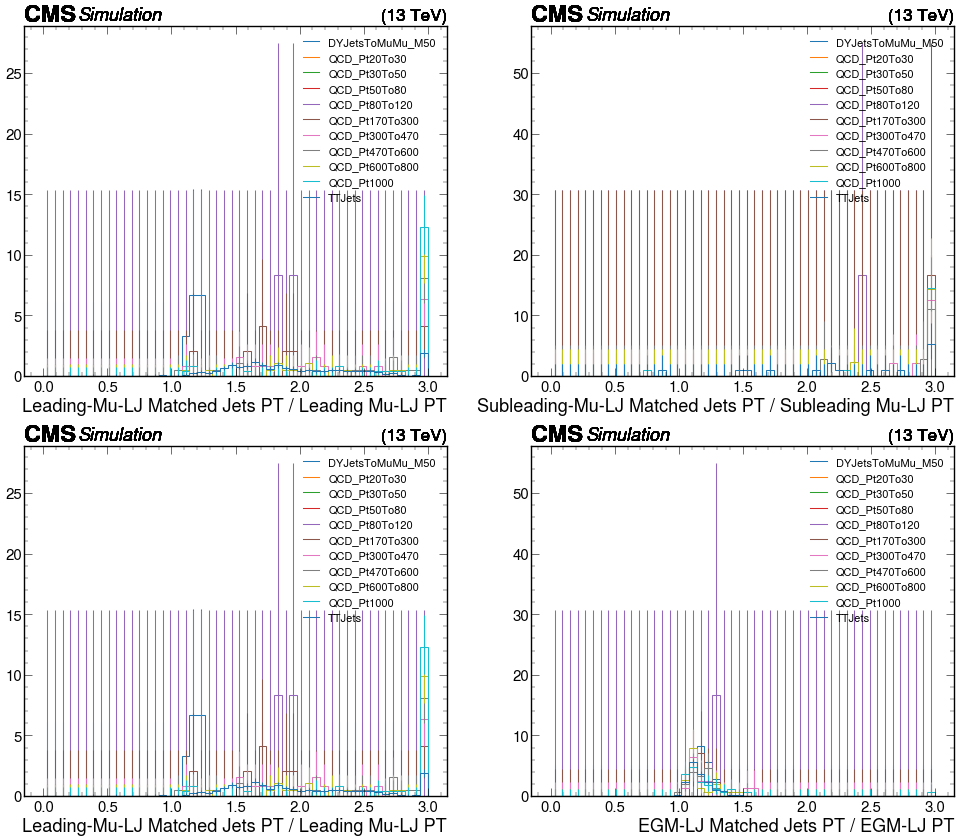

In [20]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["egm_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

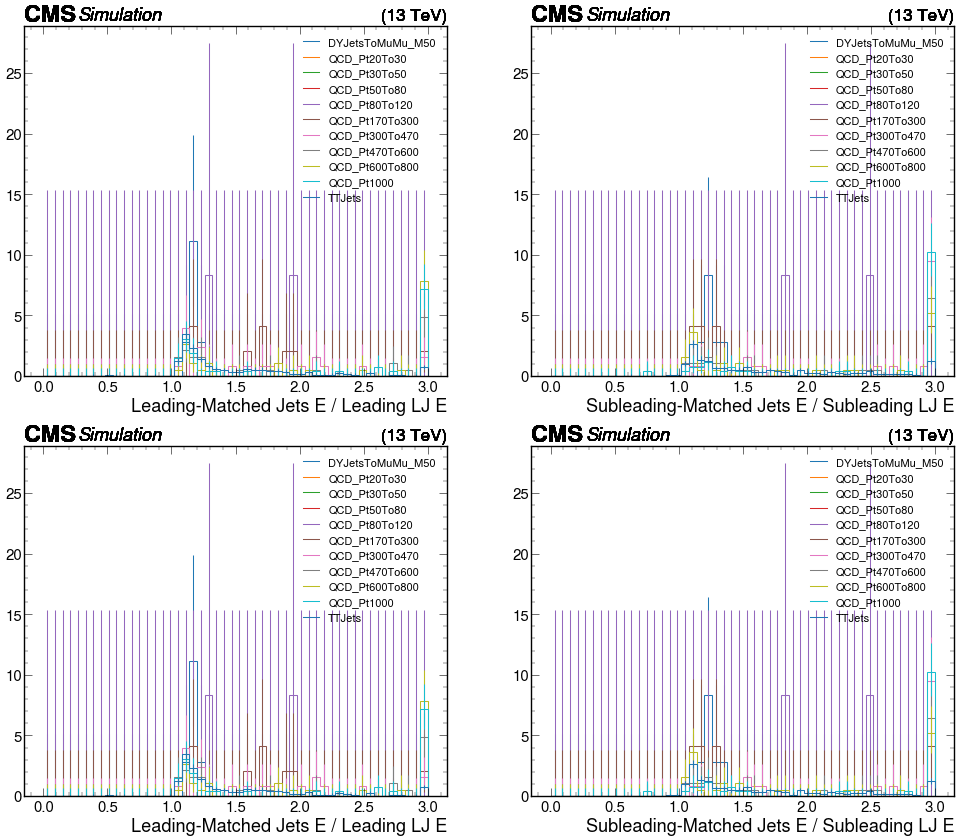

In [21]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

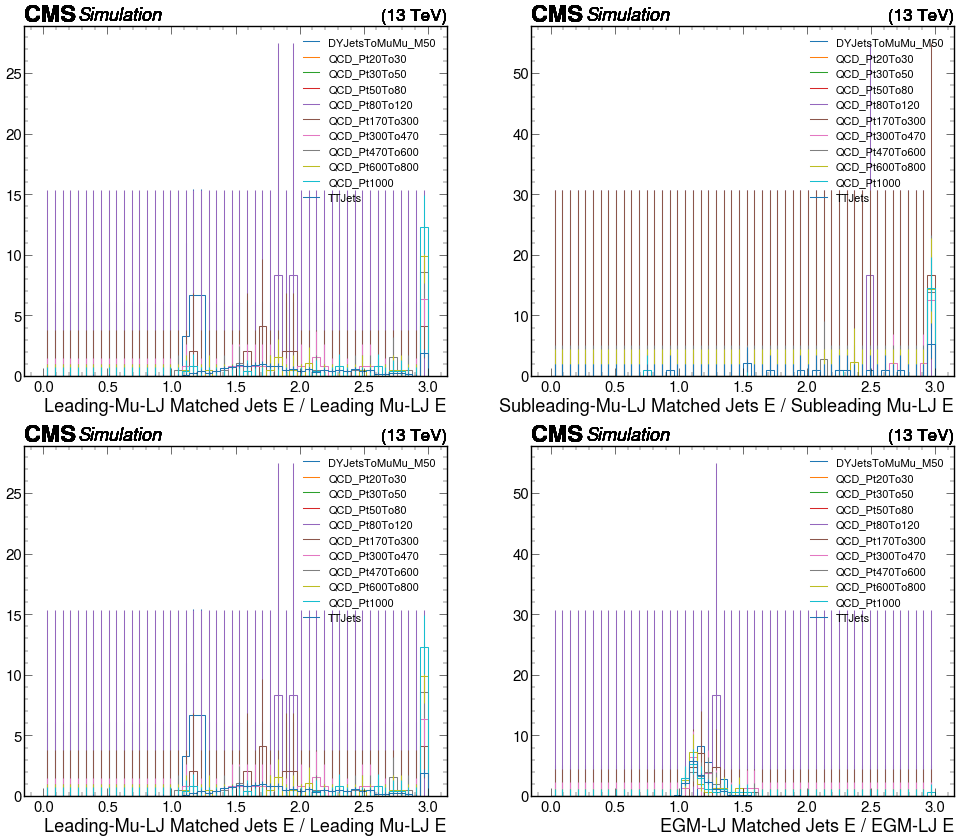

In [22]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["egm_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

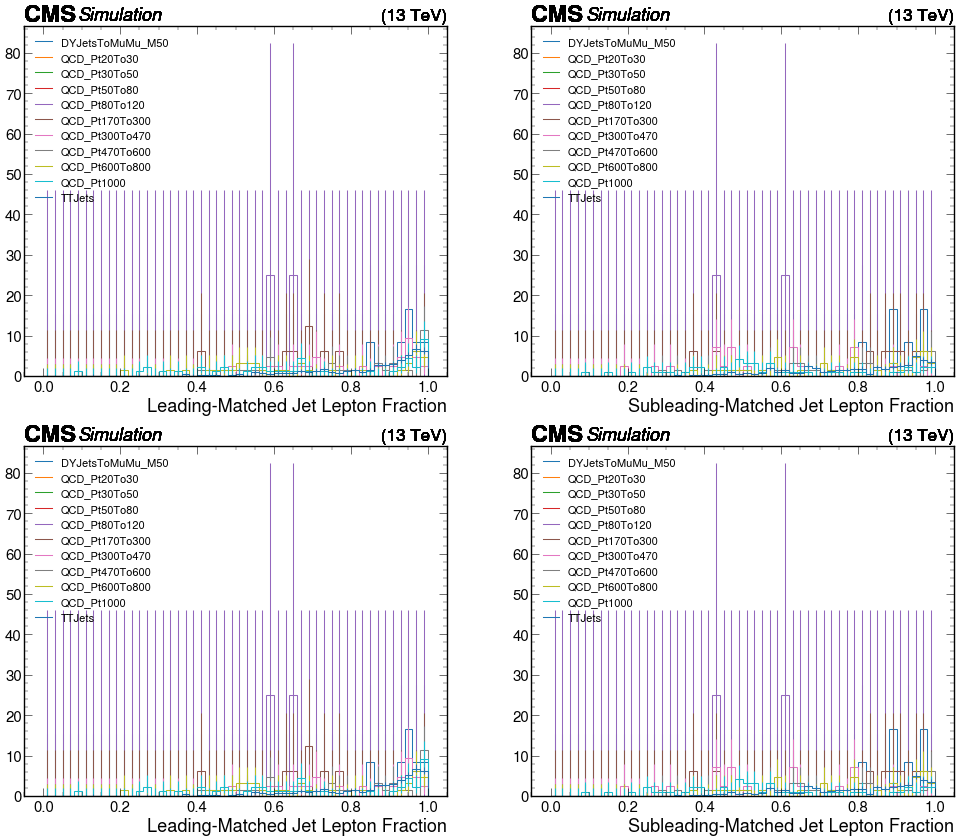

In [23]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

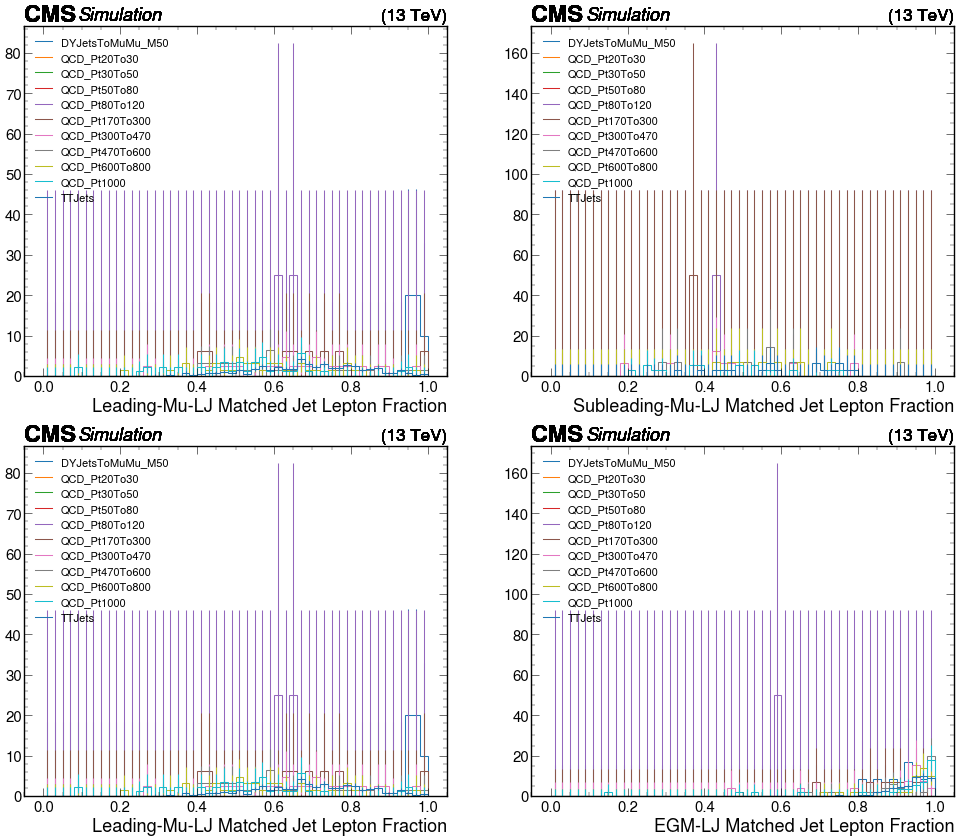

In [24]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["egm_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

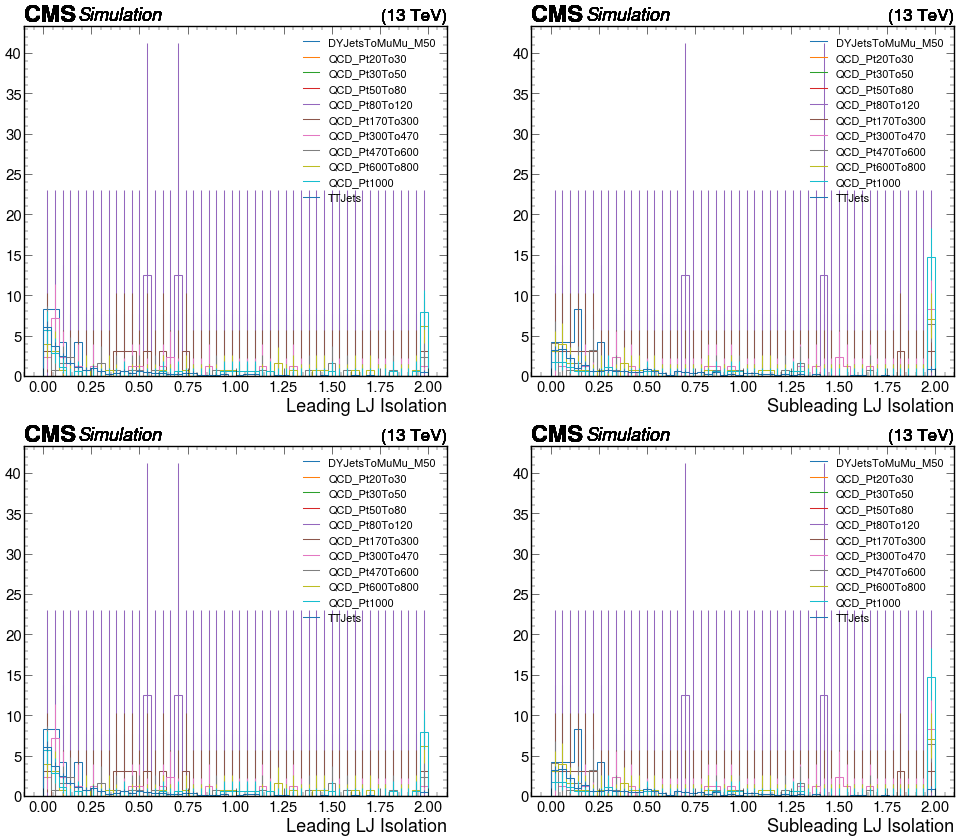

In [25]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

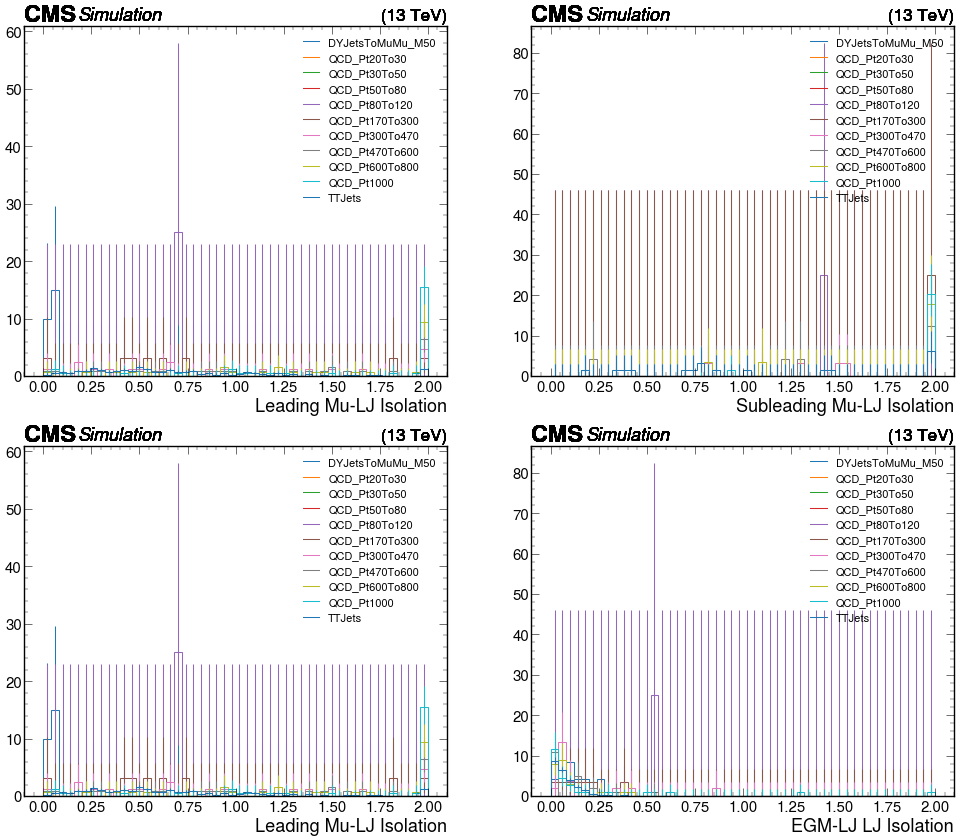

In [26]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

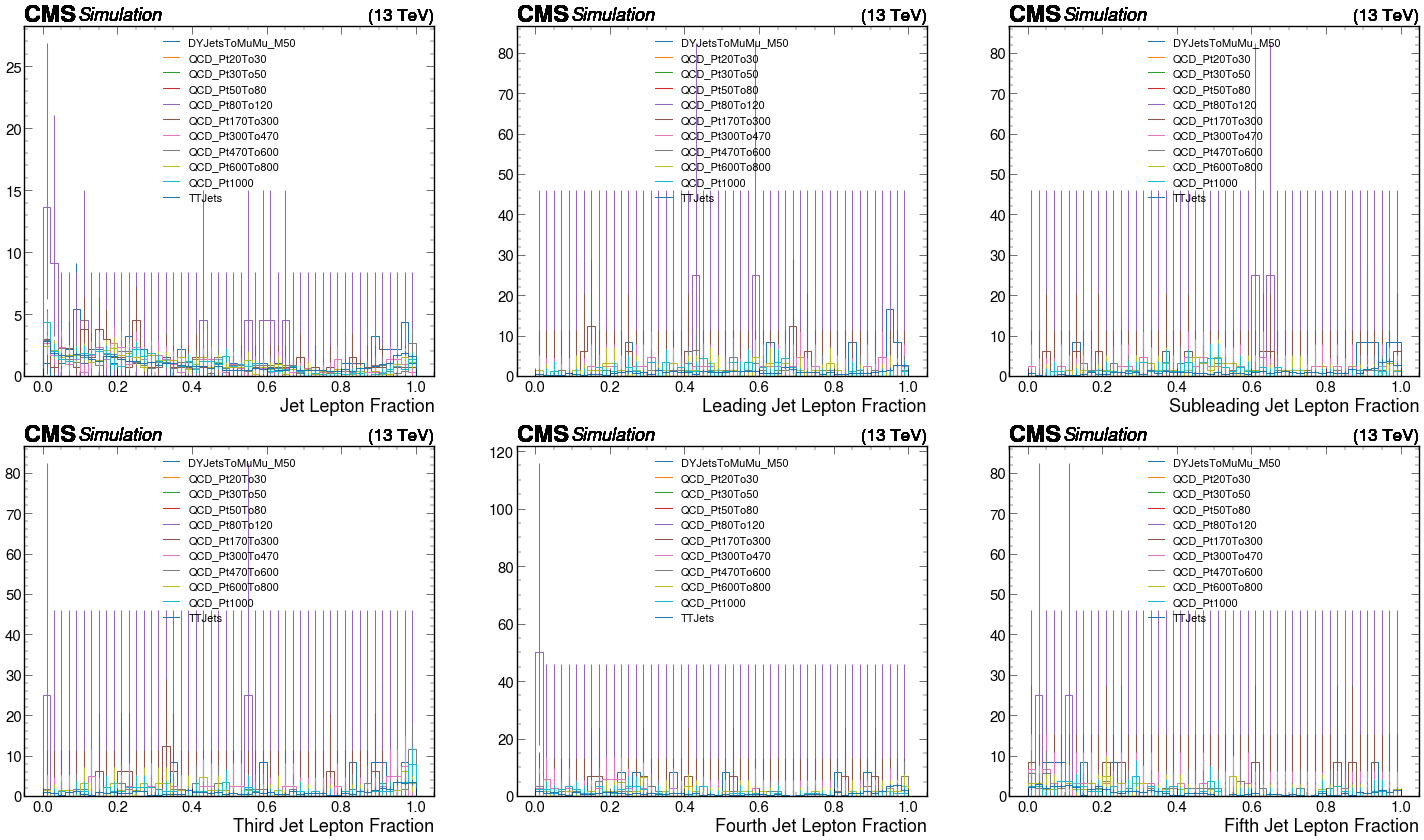

In [27]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet1_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet2_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet3_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet4_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet5_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

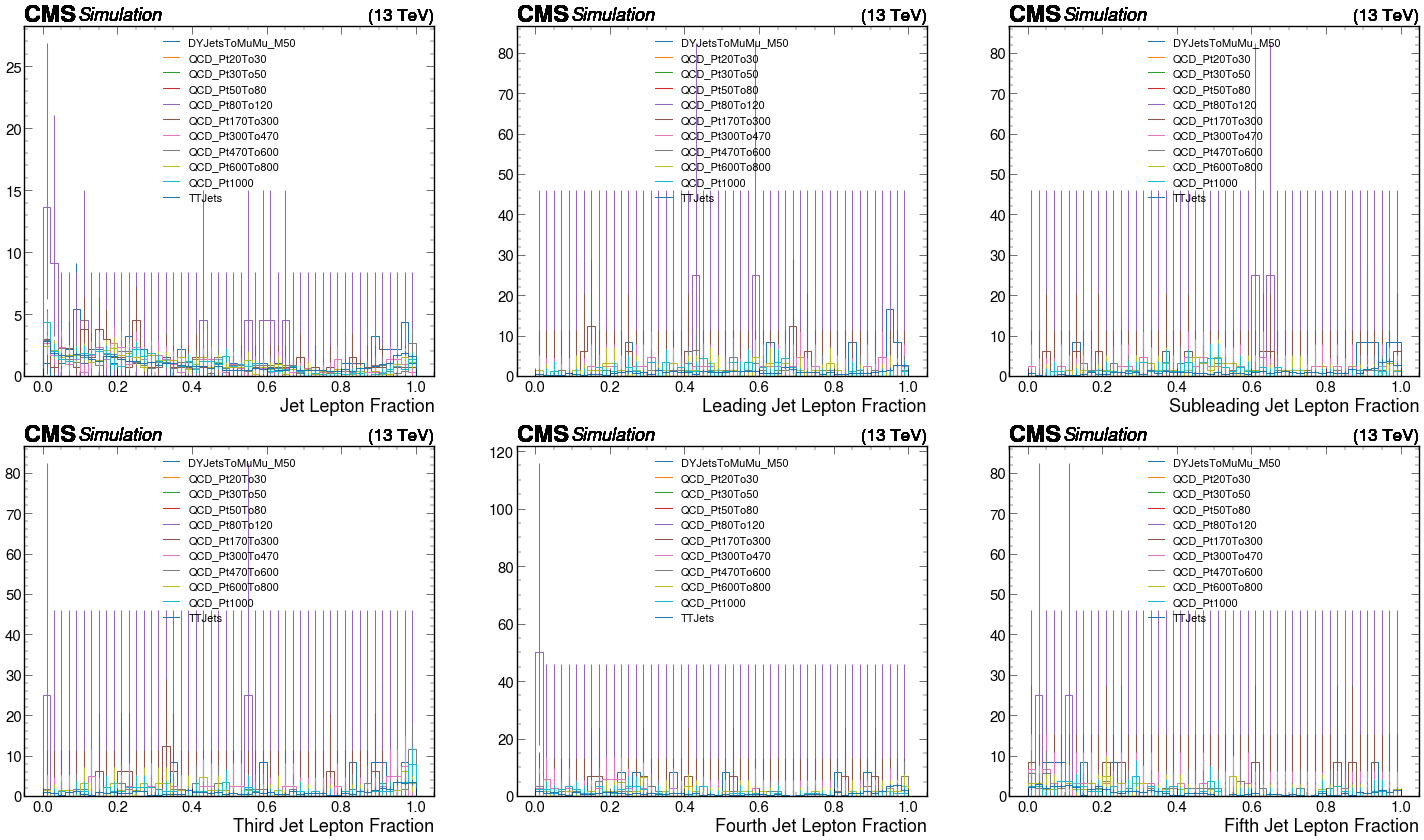

In [28]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet1_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet2_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet3_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet4_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet5_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=9, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

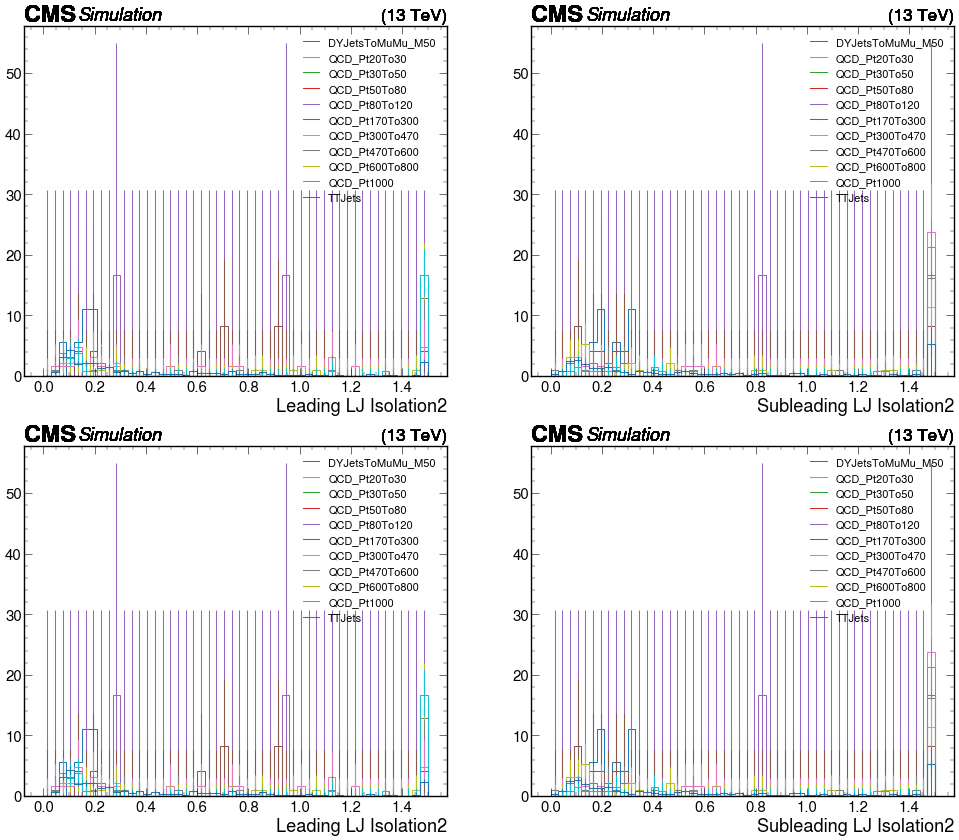

In [30]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

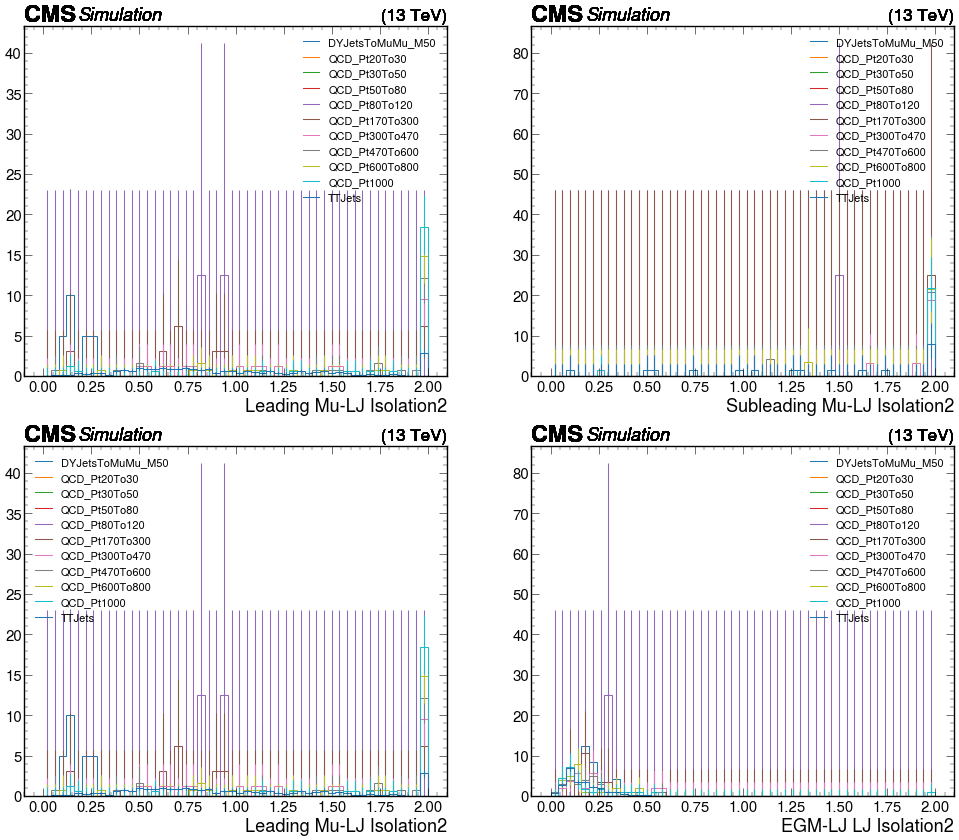

In [31]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["subleading_mu_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["leading_mu_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=2, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["egm_lj_isolation2"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 16})

In [32]:
for sample in samples_bkg:
    print(sample, "Total LJs", out_bkg[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_bkg[sample]["counters"]["0.4"]['base']['Mu-LJs'])
    print(sample, "Total EGM-LJs", out_bkg[sample]["counters"]["0.4"]['base']['EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_bkg[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_bkg[sample]["counters"]["0.4"]['base']['Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_bkg[sample]["counters"]["0.4"]['base']['Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_bkg[sample]["counters"]["0.4"]['base']['EGM-Matched-Jets'])
    print("##############################")
    print("")

DYJetsToMuMu_M50 Total LJs 12
DYJetsToMuMu_M50 Total Mu-LJs 5
DYJetsToMuMu_M50 Total EGM-LJs 7

DYJetsToMuMu_M50 Total Matched-Jets 12
DYJetsToMuMu_M50 Total Leading-Mu-Matched-Jets 5
DYJetsToMuMu_M50 Total Subleading-Mu-Matched-Jets 0
DYJetsToMuMu_M50 Total EGM-Matched-Jets 6
##############################

QCD_Pt20To30 Total LJs 0
QCD_Pt20To30 Total Mu-LJs 0
QCD_Pt20To30 Total EGM-LJs 0

QCD_Pt20To30 Total Matched-Jets 0
QCD_Pt20To30 Total Leading-Mu-Matched-Jets 0
QCD_Pt20To30 Total Subleading-Mu-Matched-Jets 0
QCD_Pt20To30 Total EGM-Matched-Jets 0
##############################

QCD_Pt30To50 Total LJs 0
QCD_Pt30To50 Total Mu-LJs 0
QCD_Pt30To50 Total EGM-LJs 0

QCD_Pt30To50 Total Matched-Jets 0
QCD_Pt30To50 Total Leading-Mu-Matched-Jets 0
QCD_Pt30To50 Total Subleading-Mu-Matched-Jets 0
QCD_Pt30To50 Total EGM-Matched-Jets 0
##############################

QCD_Pt50To80 Total LJs 0
QCD_Pt50To80 Total Mu-LJs 0
QCD_Pt50To80 Total EGM-LJs 0

QCD_Pt50To80 Total Matched-Jets 0
QCD_Pt50To80 

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

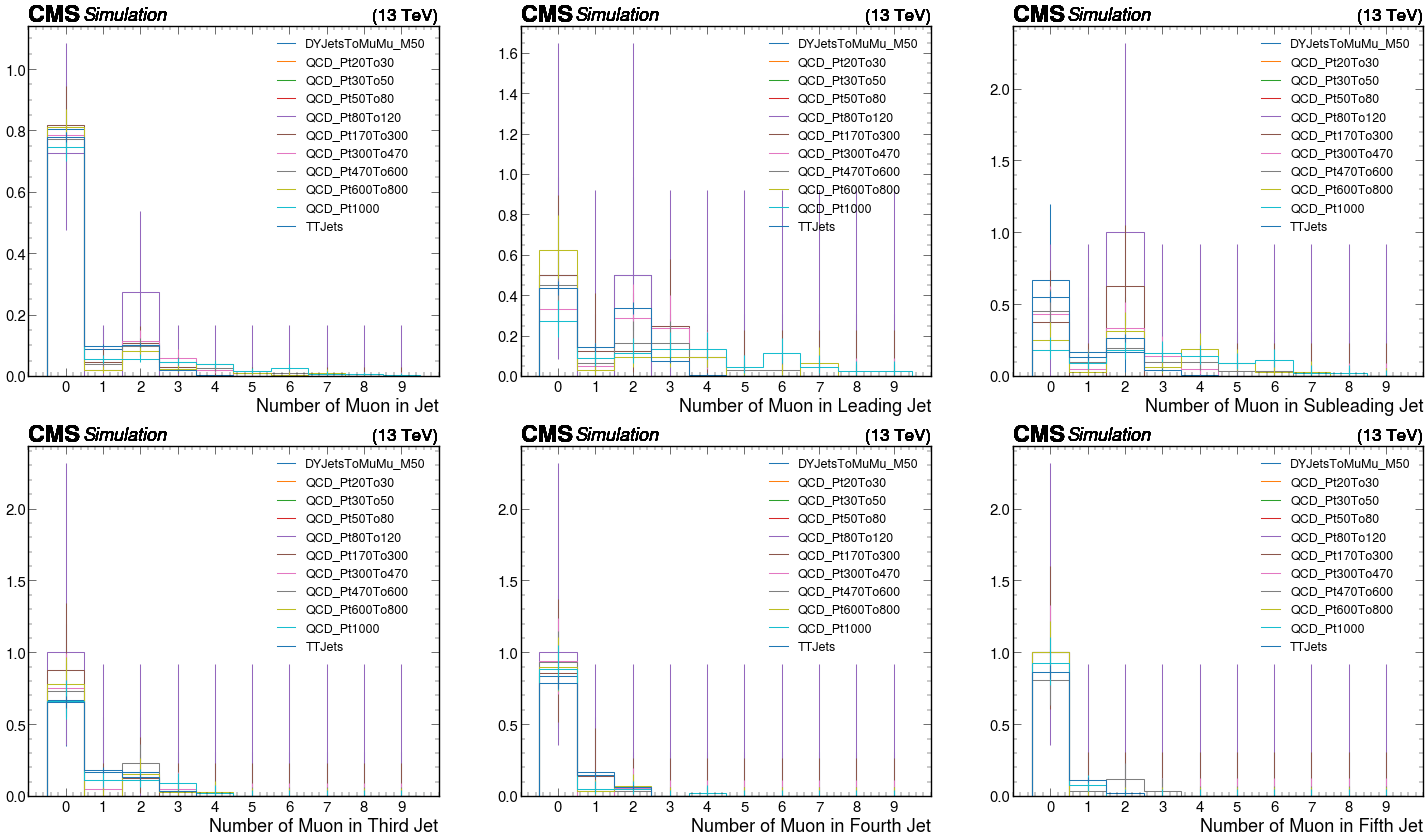

In [33]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet_nmuon"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet1_nmuon"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet2_nmuon"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet3_nmuon"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet4_nmuon"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet5_nmuon"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

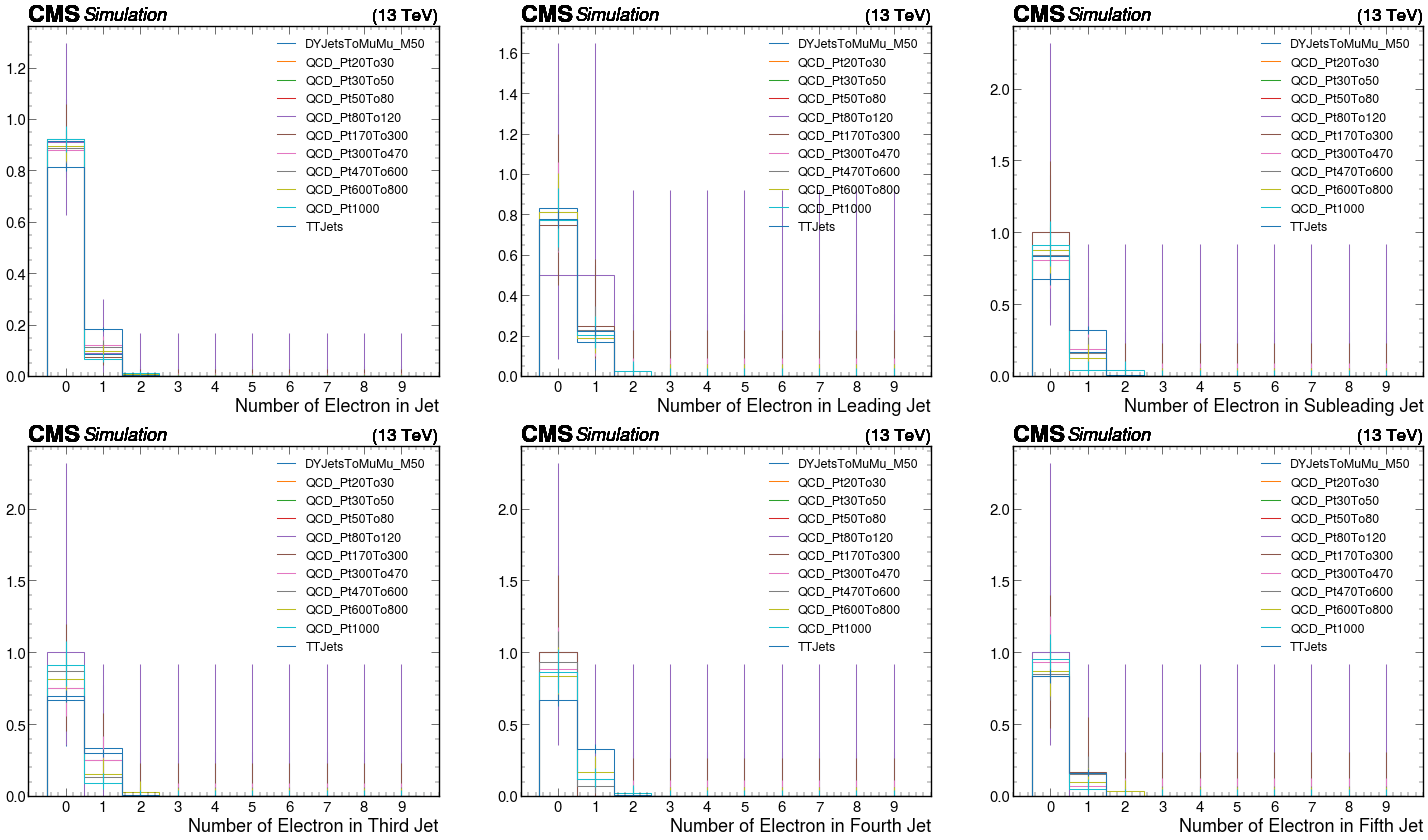

In [34]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet_nelectron"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet1_nelectron"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet2_nelectron"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet3_nelectron"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet4_nelectron"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_bkg:
    utilities.plot(out_bkg[sample]["hists"]["jet5_nelectron"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

In [6]:
for sample in samples_bkg:
    print(sample)
    out_bkg[sample]["cutflow"]["base"].print_table(fraction=False)
    print()
    print()

DYJetsToMuMu_M10to50
cut name            individual cut N              all cut N
-------------  ---------------------  ---------------------
No selection   3132062775568760832.0  3132062775568760832.0
pass triggers             13455158.0             13455158.0
PV filter      3132062775568760832.0             13445682.0
>=2 LJs                      28426.5                 9475.5


DYJetsToMuMu_M50
cut name         individual cut N     all cut N
-------------  ------------------  ------------
No selection         6161516032.0  6161516032.0
pass triggers        1981243392.0  1981243392.0
PV filter            6136102912.0  1974631168.0
>=2 LJs                   58951.8       16506.5


QCD_Pt20To30
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection            1622054.8    1622054.8
pass triggers               103.0        103.0
PV filter               1619265.6        103.0
>=2 LJs                       0.0          0.0


QCD_Pt30To50


In [7]:
for sample in samples_bkg:
    print(sample)
    out_bkg[sample]["cutflow"]["base"].print_table(fraction=True)
    print()
    print()

DYJetsToMuMu_M10to50
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers             0.0      0.0
PV filter               100.0      0.0
>=2 LJs                   0.0      0.0


DYJetsToMuMu_M50
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers            32.2     32.2
PV filter                99.6     32.0
>=2 LJs                   0.0      0.0


QCD_Pt20To30
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers             0.0      0.0
PV filter                99.8      0.0
>=2 LJs                   0.0      0.0


QCD_Pt30To50
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers             0.0      0.0
PV filter                99.8      0.0
>=2 LJs                   0.0    

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm